No existant edges 
311 0


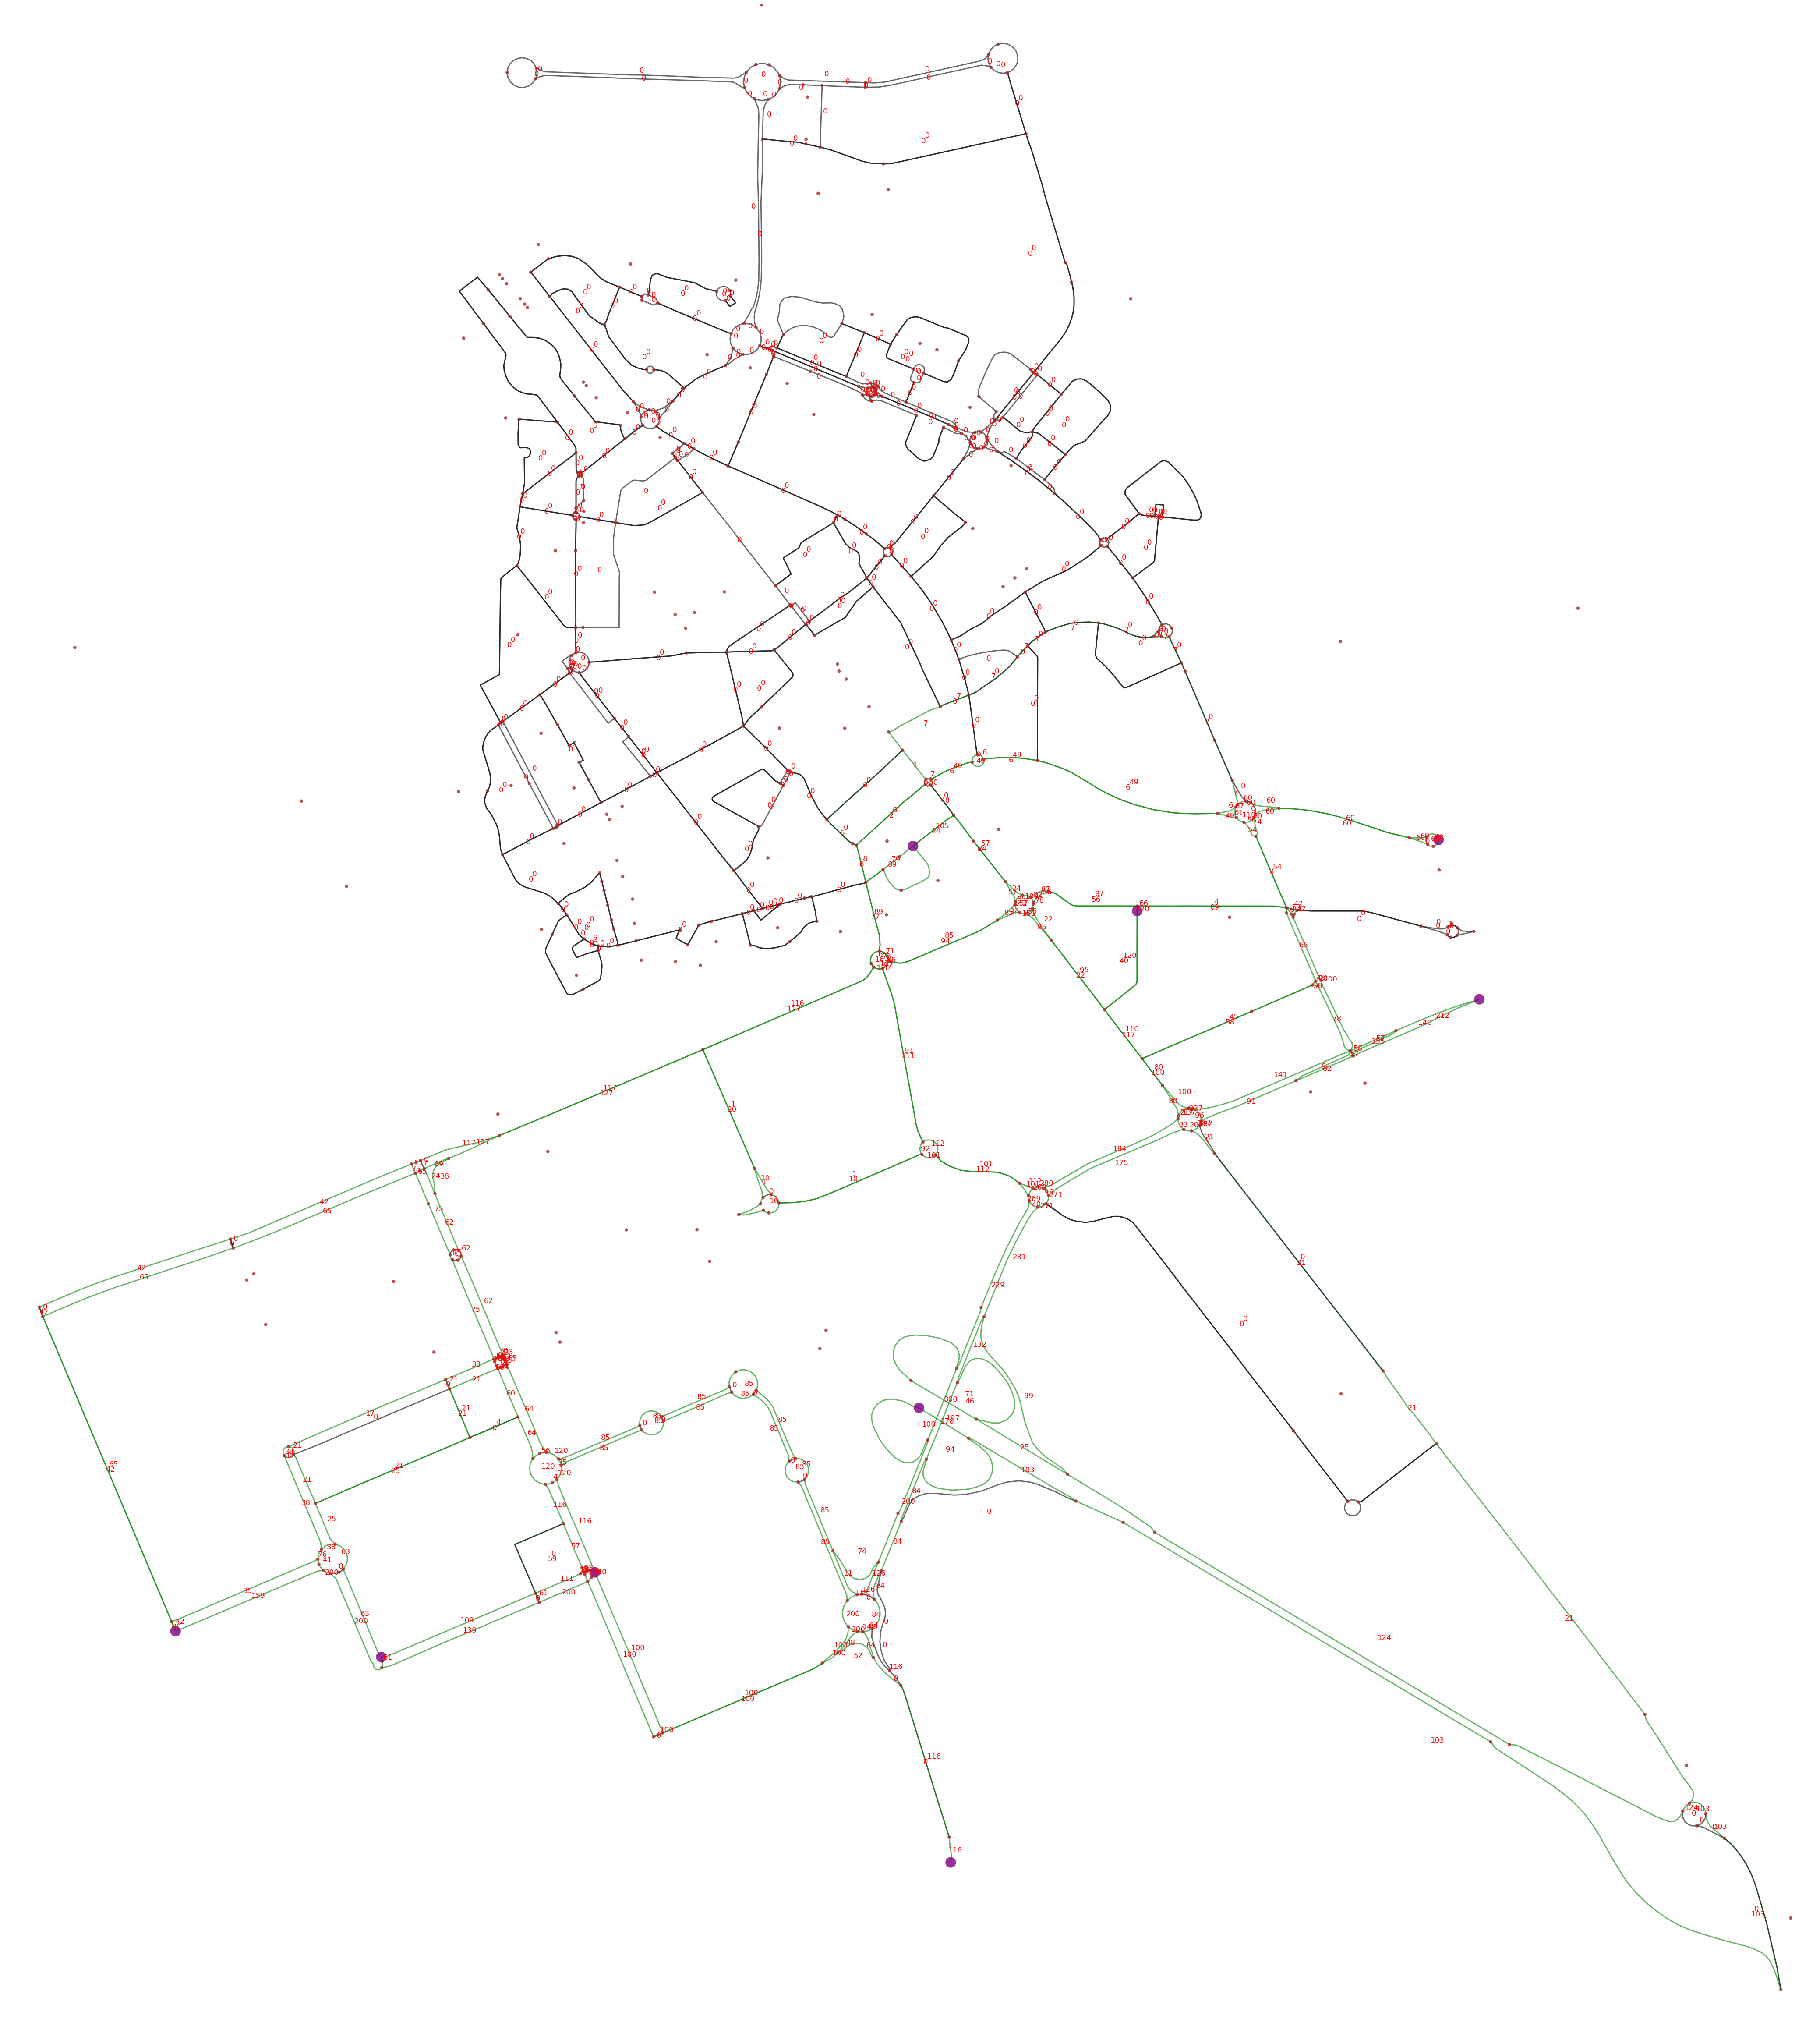

In [ ]:
import pickle
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import numpy as np
import os
import sys
os.chdir('C:\\Users\\HADDAM\\Documents\\Python Scripts\\multi_flow_decomp\\')
from utils.graph_utils import init_graph_arc_attribute_vals, get_arcs


# Get the original graph (in .gpickle format) which is obtained from osm data form converting 'str' data to 'int' data
# and filling missing data
nx_network_path_file = "data/real_data/original_graphs/lieusaint.gpickle"
with open(nx_network_path_file, 'rb') as f:
    original_nx_graph = pickle.load(f)    
crs = original_nx_graph.graph['crs']
original_nx_nodes = list(original_nx_graph.nodes(data = True))


# Get the graph (in .npy format) which is obtained from aggregating the data represented with lists
# deleting duplicate edges, 
# deleting arcs which are either not reachable from the source or which can not be reached from the destination
# and deleting (intermediary) 2 neighbours, and one neighbour nodes
np_network_path_file = "data/real_data/pre_processed/LieuSaint/real_instance_lieusaint.npy"
dict_original_network = np.load(np_network_path_file, 
                                allow_pickle = True).flatten()[0]
graph = dict_original_network["graph"]
arcs = dict_original_network["arcs"]
node_list_nx = dict_original_network["nodes"]
arc_list_nx = [(node_list_nx[i], node_list_nx[j]) for i, j in dict_original_network["arcs"]]
geometries_nx = dict_original_network["geometries"]


# Get a multi flow instance generated (the multi flow instance of number 'num_instance')
num_instance = 0
multi_flow_instance_path_file = "data/real_data/pre_processed/LieuSaint/multi_flow_instances/multi_flow_instance_"+str(num_instance)+".npy"
dict_instance_multi_flow = np.load(multi_flow_instance_path_file, 
                                allow_pickle = True).flatten()[0]
multi_flow = dict_instance_multi_flow["multi_flow"]
# Process the 'interest points' associated to the multi flow instance
sources_set = set(node_list_nx[pair[0]] for pair in dict_instance_multi_flow["pairs"])
destinations_set = set(node_list_nx[pair[1]] for pair in dict_instance_multi_flow["pairs"])
interest_points_xy = sources_set | destinations_set
aggregated_flow = init_graph_arc_attribute_vals(graph)
# Construct the aggregated flow associated to the multi flow instance
for u, v in arcs: aggregated_flow[u][v] = sum(multi_flow[i][u].get(v, 0) for i in range(len(multi_flow)))


# Create the subgraph containing the edges which contains flow (for which aggregated_flow > 0)
sub_g = nx.MultiDiGraph()
sub_g.graph['crs'] = crs
sub_g.add_nodes_from(original_nx_nodes)
sub_g.add_edges_from([(u, v, {"geometry":geometries_nx[i],
                            "aggregated_flow":aggregated_flow.get(node_list_nx.index(u), 
                                                                  {}).get(node_list_nx.index(v), 0)}) 
                                for i, (u, v) in enumerate(arc_list_nx)])


# Print the number of edges which are present in the aggregated flow and not in the graph (this number must be 0) 
flow_edge_list_nx = [(node_list_nx[i], node_list_nx[j]) for i, j in arcs if aggregated_flow[i].get(j, 0) > 0]
no_existant_edges = set()
for u, v in flow_edge_list_nx:
    if (u, v) not in {(e[0], e[1]) for e in arc_list_nx}:
       no_existant_edges.add((u, v))
print("No existant edges ")
print(len(flow_edge_list_nx), len(no_existant_edges)) 


# Color the edges of the graph  : green for the edges which contains flow and black for the edges which does not
edge_colors = []
for u, v, k, data in sub_g.edges(keys = True, data = True):
    if (u, v) in flow_edge_list_nx:
        edge_color = "green"
    else:
        edge_color = "black"
    edge_colors.append(edge_color)


# Color the nodes which are opints of interest with purple and the others with brown, give them different sizes
node_colors, node_sizes = [], []
for node, data in sub_g.nodes(data = True):
    if node in interest_points_xy:
        node_color = "purple"
        node_size = 300
    else:
        node_color = "brown"
        node_size = 30
    node_colors.append(node_color)
    node_sizes.append(node_size)



# Plot the graph
fig, ax = ox.plot_graph(
    sub_g,
    figsize=(60, 60),
    node_color=node_colors,
    node_size=node_sizes,
    edge_color=edge_colors,
    edge_linewidth=2,
    edge_alpha=0.6,   # transparency (0 = fully transparent, 1 = opaque)
    node_alpha=0.8,
    bgcolor="white",
    show=False,
    close=False
)


# Annotate each edge of the graph with its aggregated flow value 
for u, v, k, data in sub_g.edges(keys=True, data=True):
    x1, y1 = sub_g.nodes[u]["x"], sub_g.nodes[u]["y"]
    x2, y2 = sub_g.nodes[v]["x"], sub_g.nodes[v]["y"]

    add_ = 0.00005 if u > v else -0.00005

    # compute edge midpoint
    xm = ((x1 + x2) / 2) + add_
    ym = ((y1 + y2) / 2) + add_

    # Add label
    ax.text(xm, ym, str(sub_g[u][v][k]["aggregated_flow"]), fontsize=12, color="red")


plt.show()

In [ ]:
import pickle
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import numpy as np
import os
import sys
os.chdir('C:\\Users\\HADDAM\\Documents\\Python Scripts\\multi_flow_decomp\\')
from utils.graph_utils import init_graph_arc_attribute_vals, get_arcs


with open("data/real_data/original_graphs/lieusaint.gpickle", 'rb') as f:
    original_nx_graph = pickle.load(f)
crs = original_nx_graph.graph['crs']
original_nx_nodes = list(original_nx_graph.nodes(data = True))


dict_original_network = np.load("data/real_data/pre_processed/LieuSaint/real_instance_lieusaint.npy", 
                                allow_pickle = True).flatten()[0]
graph = dict_original_network["graph"]
arcs = dict_original_network["arcs"]
node_list_nx = dict_original_network["nodes"]
arc_list_nx = [(node_list_nx[i], node_list_nx[j]) for i, j in dict_original_network["arcs"]]
geometries_nx = dict_original_network["geometries"]


num_instance = 0
dict_instance_multi_flow = np.load("data/real_data/pre_processed/LieuSaint/multi_flow_instances/multi_flow_instance_"+str(num_instance)+".npy", 
                                   allow_pickle = True).flatten()[0]
multi_flow = dict_instance_multi_flow["multi_flow"]
sources_set = set(node_list_nx[pair[0]] for pair in dict_instance_multi_flow["pairs"])
destinations_set = set(node_list_nx[pair[1]] for pair in dict_instance_multi_flow["pairs"])
interest_points_xy = sources_set | destinations_set
aggregated_flow = init_graph_arc_attribute_vals(graph)
for u, v in arcs: aggregated_flow[u][v] = sum(multi_flow[i][u].get(v, 0) for i in range(len(multi_flow)))



# Create the graph
sub_g = nx.MultiDiGraph()
sub_g.graph['crs'] = crs
sub_g.add_nodes_from(original_nx_nodes)
sub_g.add_edges_from([(u, v, {"geometry":geometries_nx[i],
                              "aggregated_flow":aggregated_flow.get(node_list_nx.index(u), {}).get(node_list_nx.index(v), 0)}) 
                                for i, (u, v) in enumerate(arc_list_nx)])


# Color the edges
flow_edge_list_nx = [(node_list_nx[i], node_list_nx[j]) for i, j in arcs if aggregated_flow[i].get(j, 0) > 0]
no_existant_edges = set()
for u, v in flow_edge_list_nx:
    if (u, v) not in {(e[0], e[1]) for e in arc_list_nx}:
       no_existant_edges.add((u, v))
print("No existant edges ")
print(len(flow_edge_list_nx), len(no_existant_edges)) 


edge_colors = []
for u, v, k, data in sub_g.edges(keys = True, data = True):
    if (u, v) in flow_edge_list_nx:
        edge_color = "green"
    else:
        edge_color = "black"
    edge_colors.append(edge_color)


node_colors, node_sizes = [], []
for node, data in sub_g.nodes(data = True):
    if node in interest_points_xy:
        node_color = "purple"
        node_size = 300
    else:
        node_color = "brown"
        node_size = 30
    node_colors.append(node_color)
    node_sizes.append(node_size)


fig, ax = ox.plot_graph(
    sub_g,
    figsize=(60, 60),
    node_color=node_colors,
    node_size=node_sizes,
    edge_color=edge_colors,
    edge_linewidth=2,
    edge_alpha=0.6,   # transparency (0 = fully transparent, 1 = opaque)
    node_alpha=0.8,
    bgcolor="white",
    show=False,
    close=False
)


for u, v, k, data in sub_g.edges(keys=True, data=True):
    x1, y1 = sub_g.nodes[u]["x"], sub_g.nodes[u]["y"]
    x2, y2 = sub_g.nodes[v]["x"], sub_g.nodes[v]["y"]

    add_ = 0.00005 if u > v else -0.00005

    # compute edge midpoint
    xm = ((x1 + x2) / 2) + add_
    ym = ((y1 + y2) / 2) + add_

    # Add label
    ax.text(xm, ym, str(sub_g[u][v][k]["aggregated_flow"]), fontsize=10, color="red")

plt.show()